# This notebook describes (some of) our work on the "Data Encryption from Encrypted Video Streams" Engineering project.

In [27]:
%matplotlib inline

# data exploration - look at saved csv file for video

In [28]:
import pandas as pd

path = r'C:\Desktop stuff\university\camera captures\hik pcaps n CSVs' 
df = pd.read_csv(path + "/1 men/1 vic.csv")
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,2,0.006711,192.168.1.35,192.168.1.105,TCP,1514,80 > 54294 [ACK] Seq=1 Ack=1 Win=7836 Len=1460
1,3,0.006878,192.168.1.35,192.168.1.105,TCP,758,"80 > 54294 [PSH, ACK] Seq=1461 Ack=1 Win=783..."
2,5,0.046800,192.168.1.35,192.168.1.105,TCP,1514,80 > 54294 [ACK] Seq=2165 Ack=1 Win=7836 Len...
3,6,0.046979,192.168.1.35,192.168.1.105,TCP,1086,"80 > 54294 [PSH, ACK] Seq=3625 Ack=1 Win=783..."
4,8,0.086498,192.168.1.35,192.168.1.105,TCP,1514,80 > 54294 [ACK] Seq=4657 Ack=1 Win=7836 Len...


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157039 entries, 0 to 157038
Data columns (total 7 columns):
No.            157039 non-null int64
Time           157039 non-null float64
Source         157039 non-null object
Destination    157039 non-null object
Protocol       157039 non-null object
Length         157039 non-null int64
Info           157039 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 8.4+ MB


# graphs for experiments

# graphs for "crazy square" test

average bitrate: 112.7


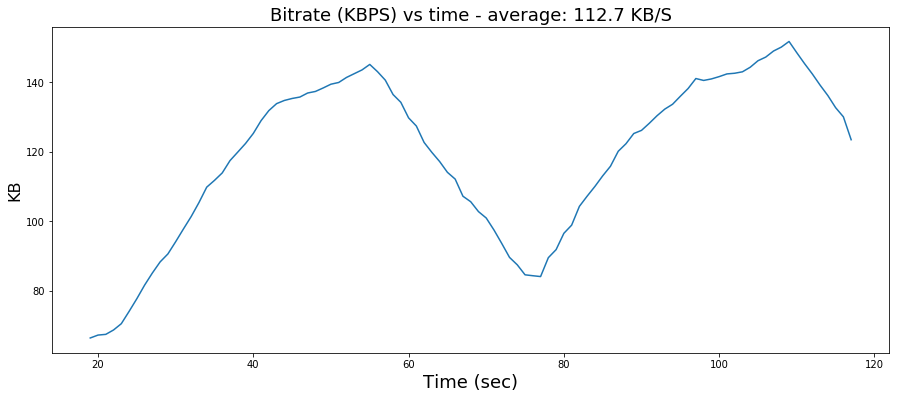

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#to read multiple CSVs automatically
path = r'C:\Desktop stuff\university\camera captures\2019-05-07 vids + scripts\frame_test.csv' 

labels_dfs = pd.read_csv(path)
plt.figure(figsize = (15,6))
legendTitles = []

labels_dfs.drop(['Source' , 'Destination' , 'Protocol' , 'Info' , 'No.'], axis=1, inplace=True)

df = labels_dfs
df['key'] = np.array(df['Time']).astype(int)
df = df.groupby('key',axis=0).sum()

df['bytes'] = df['Length'].cumsum()  
avg_bps = "{:.1f}".format(df['Length'].sum() / (len(df['Length'])*1000))
print("average bitrate:" ,avg_bps)
df['rollLen'] = df['Length'].rolling(20).mean() #in bytes
df['rollLen'] = df['rollLen']/1000 #KBPS

plt.plot(range(len(df['rollLen'])), df['rollLen'])
title = "Bitrate (KBPS) vs time - average: " + avg_bps + " KB/S"
plt.title(title, fontsize=18)
plt.xlabel('Time (sec)', fontsize=18); plt.ylabel('KB', fontsize=16)
plt.show()

# graphs for motion increase test

average bitrate: 143.4


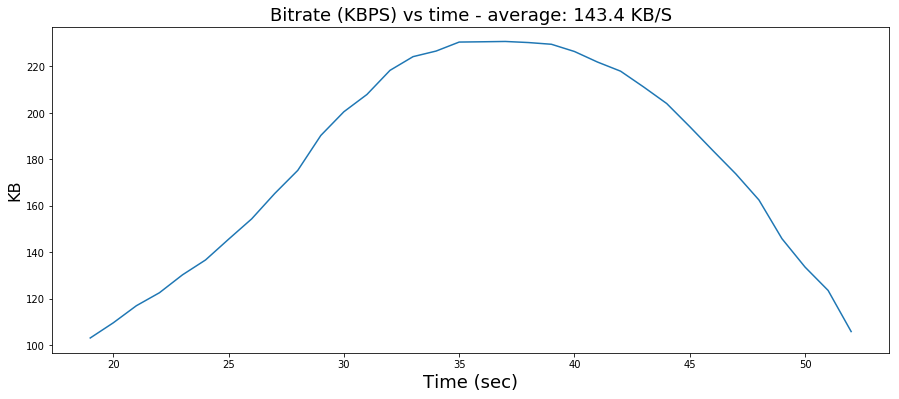

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#to read multiple CSVs automatically
path = r'C:\Desktop stuff\university\camera captures\2019-05-07 vids + scripts\motion increase test.csv' 


labels_dfs = pd.read_csv(path)
plt.figure(figsize=(15,6))
#plt.ylim((0,250))
legendTitles = []

labels_dfs.drop(['Source' , 'Destination' , 'Protocol' , 'Info' , 'No.'], axis=1, inplace=True)

df = labels_dfs
df['key'] = np.array(df['Time']).astype(int)
df = df.groupby('key',axis=0).sum()

df['bytes'] = df['Length'].cumsum()  
avg_bps = "{:.1f}".format(df['Length'].sum() / (len(df['Length'])*1000))
print("average bitrate:" ,avg_bps)
df['rollLen'] = df['Length'].rolling(20).mean() #in bytes
df['rollLen'] = df['rollLen']/1000 #KBPS
plt.plot(range(len(df['rollLen'])), df['rollLen'])
title = "Bitrate (KBPS) vs time - average: " + avg_bps + " KB/S"
plt.title(title, fontsize=18)
plt.xlabel('Time (sec)', fontsize=18); plt.ylabel('KB', fontsize=16)
    
plt.show()

# obtaining labels_dfs list - list of all dfs, per each label 
first index indicates label. second one: the location. for instance, labels_dfs[2][1] = label 2, location 1

In [32]:
num_dfs_tot = 0
sec_to_cut = 15

#to read multiple CSVs automatically
import glob
path = r'C:\Desktop stuff\university\camera captures\hik pcaps n CSVs' 
allFolderPaths = glob.glob(path + "/*")
time_sliced = pd.DataFrame()
num_labels = len(allFolderPaths)
labels_dfs = [0]*num_labels

#read all CSVs for label i, and cut 15 sec of start and end of each video.
for i in range(num_labels) :
    labels_dfs[i] = [pd.read_csv(f) for f in glob.glob(allFolderPaths[i] + "/*.csv")]
    num_dfs_tot += len(labels_dfs[i])
    
    for j in range(len(labels_dfs[i])) :
        labels_dfs[i][j].drop(['Source' , 'Destination' , 'Protocol' , 'Info' , 'No.'], axis=1, inplace=True)
        labels_dfs[i][j] = labels_dfs[i][j][labels_dfs[i][j].Time > sec_to_cut]
        labels_dfs[i][j] = labels_dfs[i][j][labels_dfs[i][j].Time < labels_dfs[i][j]["Time"].iloc[-1] - sec_to_cut]
        labels_dfs[i][j]['Time'] -= sec_to_cut
        labels_dfs[i][j]['Label'] = i
        labels_dfs[i][j]['location'] = j
        
labels_dfs[2][1][:10]

,Time,Length,Label,location
1755,0.029887,1514,2,1
1756,0.030109,1514,2,1
1757,0.030240,1514,2,1
1758,0.030422,1006,2,1
1759,0.069837,1514,2,1
1760,0.070047,1514,2,1
1761,0.070140,1514,2,1
1762,0.070260,878,2,1
1763,0.109762,1514,2,1
1764,0.109878,1514,2,1


In [33]:
labels_dfs[2][1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124793 entries, 1755 to 126547
Data columns (total 4 columns):
Time        124793 non-null float64
Length      124793 non-null int64
Label       124793 non-null int64
location    124793 non-null int64
dtypes: float64(1), int64(3)
memory usage: 4.8 MB


# time sliced dataframe with features extracted (for time-slice time_slice)

In [34]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from math import ceil
import timeit

start = timeit.default_timer() #to measure runtime
time_slice = 2; #in seconds
time_sliced = pd.DataFrame()

#read all CSVs for label i, and cut 15 sec of start and end of each video.
for i in range(num_labels) :
    for j in range(len(labels_dfs[i])) :
        
        df = labels_dfs[i][j] 
        df['TimeSlice'] = (np.array(labels_dfs[i][j]['Time'])/time_slice).astype(int)
        df = df.groupby('TimeSlice',axis=0 ,sort = 'False').agg(
        {'Time'     : ['count', 'std', 'mean'],
         'Length'   : ['mean', 'sum', 'std'],
         'Label'    : 'first',
         'location'    : 'first'}).fillna(0) 
        time_sliced = time_sliced.append(df)

time_sliced.columns = ["_".join(x) for x in df.columns.ravel()]

time_sliced.rename(columns={'Time_count':'pack_count',
                          'Label_first':'Label',
                          'location_first':'location'}, inplace=True)
time_sliced.head()

,pack_count,Time_std,Time_mean,Length_mean,Length_sum,Length_std,Label,location
TimeSlice,,,,,,,,
0,110,0.550820,0.595288,928.000000,102080,597.189196,0,0
1,110,0.553784,2.596913,903.600000,99396,618.103450,0,0
2,110,0.553870,4.596848,931.672727,102484,594.438909,0,0
3,110,0.552416,6.596100,929.745455,102272,595.437892,0,0
4,110,0.553871,8.596771,917.563636,100932,605.653450,0,0


# show count for each label in the dataset

In [35]:
time_sliced['Label'].value_counts(normalize=True)

0    0.233492
1    0.207259
3    0.203528
2    0.183627
4    0.172094
Name: Label, dtype: float64

In [36]:
time_sliced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8844 entries, 0 to 593
Data columns (total 8 columns):
pack_count     8844 non-null int64
Time_std       8844 non-null float64
Time_mean      8844 non-null float64
Length_mean    8844 non-null float64
Length_sum     8844 non-null int64
Length_std     8844 non-null float64
Label          8844 non-null int64
location       8844 non-null int64
dtypes: float64(4), int64(4)
memory usage: 621.8 KB


# bitrate graph by category (or without categories)

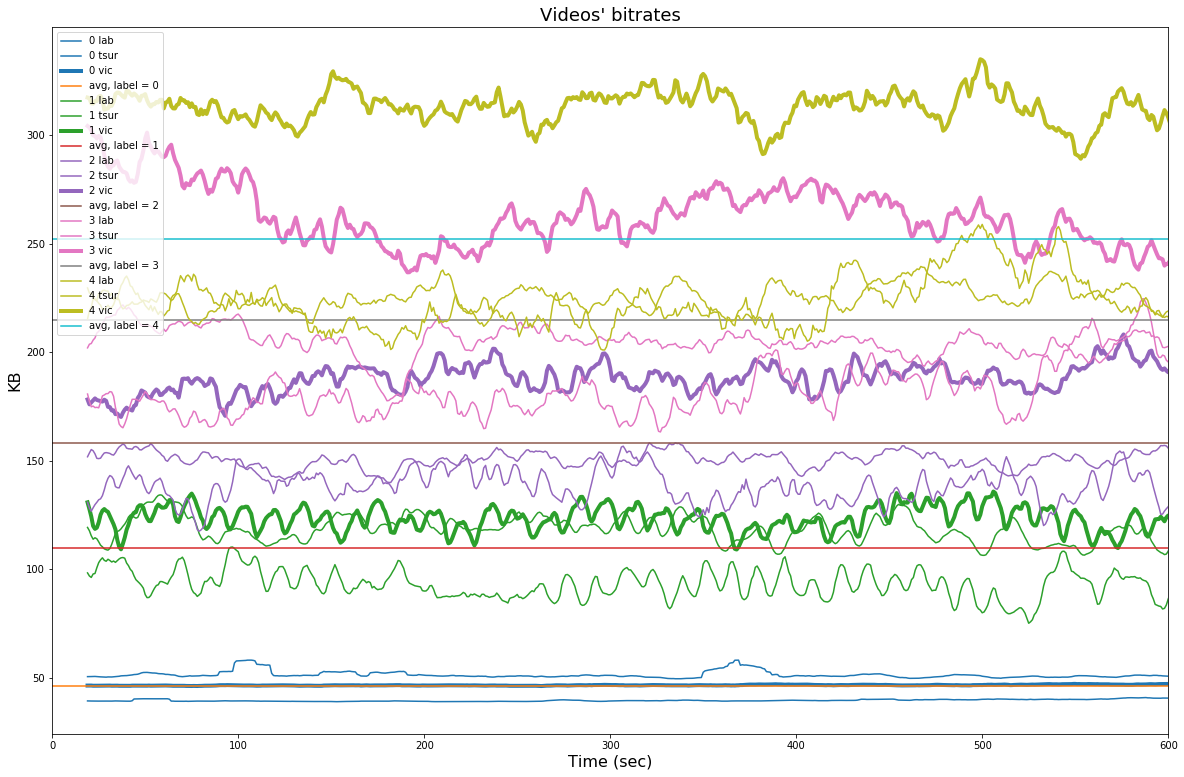

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean 

num_labels = 5;
#labels_dfs = [0]*num_labels
fileNames = [0]*num_labels

LAB = 0
TSUR = 1
VIC = 2

categories_or_singles = "cat"

#to read multiple CSVs automatically
import glob
path = r'C:\Desktop stuff\university\camera captures\hik pcaps n CSVs' 
allFolderPaths = glob.glob(path + "/*")

plt.figure(figsize=(20, 13))
legendTitles = []
ax = plt.gca() 
#max_spec_bitrate = [512]*1200
max_observed_bitrate = [458]*1200
avgs = [0]*num_labels

for i in range(num_labels) :
    #labels_dfs[i] = [pd.read_csv(f) for f in glob.glob(allFolderPaths[i] + "/*.csv")]
    fileNames[i] = [f for f in glob.glob(allFolderPaths[i] + "/*.csv")]
    plt.xlim((0,600))
    color = next(ax._get_lines.prop_cycler)['color']
    avgs[i] = []

    for j in range(len(labels_dfs[i])) :
        #labels_dfs[i][j].drop(['Source' , 'Destination' , 'Protocol' , 'Info' , 'No.'], axis=1, inplace=True)
        #labels_dfs[i][j] = labels_dfs[i][j][labels_dfs[i][j].Time > 15]
        #labels_dfs[i][j] = labels_dfs[i][j][labels_dfs[i][j].Time < labels_dfs[i][j]["Time"].iloc[-1] - 15]
        #labels_dfs[i][j]['Time'] -= 15
        #labels_dfs[i][j]['Label'] = i
        #labels_dfs[i][j]['location'] = j
        
        short_fileName = fileNames[i][j].replace('C:\\Desktop stuff\\university\\camera captures\\hik pcaps n CSVs\\' 
                                  + str(i) + ' men\\', '')
        short_fileName = short_fileName.replace('.csv', '')
        legendTitles.append(short_fileName) #'vid ' + str(i) + '.' + str(j+1))
        df = labels_dfs[i][j]
        df['key'] = np.array(df['Time']).astype(int)
        df = df.groupby('key',axis=0).sum()
        
        df['bytes'] = df['Length'].cumsum()  
        df['BPS'] = df['bytes']/df['Time']
        bps = float("{:.1f}".format(df['Length'].sum() / (len(df['Length'])*1000)))
        avgs[i].append(bps)
        
        df['rollLen'] = df['Length'].rolling(20).mean()
        df['rollLen'] = df['rollLen']/1000
        
        if(categories_or_singles == "cat"):
            if j == VIC: #outlier room
                plt.plot(range(len(df['Length'])), df['rollLen'] , linestyle = '-', color = color, linewidth=4.0)
            else:    
                plt.plot(range(len(df['Length'])), df['rollLen'] , color = color)
        else:
            if j == VIC:
                plt.plot(range(len(df['Length'])), df['rollLen'], linestyle = '-', linewidth=4.0)
            else:  
                plt.plot(range(len(df['Length'])), df['rollLen'])
#            plt.ylim((0,350))
        
        plt.xlabel('Time (sec)', fontsize=16); plt.ylabel('KB', fontsize=16)
        

    avgs[i] = int(mean(avgs[i]))
    avgLine = [avgs[i]]*1200
    legendTitles.append("avg, label = " + str(i))
    plt.plot(range(len(avgLine)), avgLine)
#legendTitles.append("max_spec_bitrate") #'vid ' + str(i) + '.' + str(j+1))    
#plt.plot(range(len(max_spec_bitrate)), max_spec_bitrate)
#legendTitles.append("max_observed_bitrate") #'vid ' + str(i) + '.' + str(j+1))    
#plt.plot(range(len(max_observed_bitrate)), max_observed_bitrate)
plt.title("Videos' bitrates", fontsize=18)
plt.legend(legendTitles)
plt.show()


# confusion matrix plot (will be used later)

In [9]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(true_class, prediction,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.YlOrRd):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = confusion_matrix(true_class, prediction)
    classes = (np.sort(np.unique(true_class)))
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

   # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.show()
    
    return

# fitting and predicting using random forest clasifier (training on lab and tsur's room, testing on vic's room - smaller one)

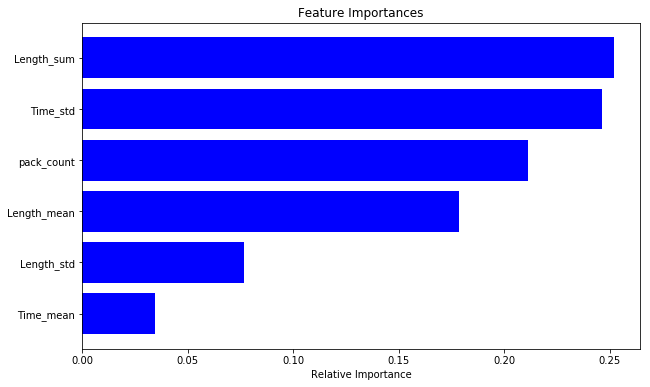

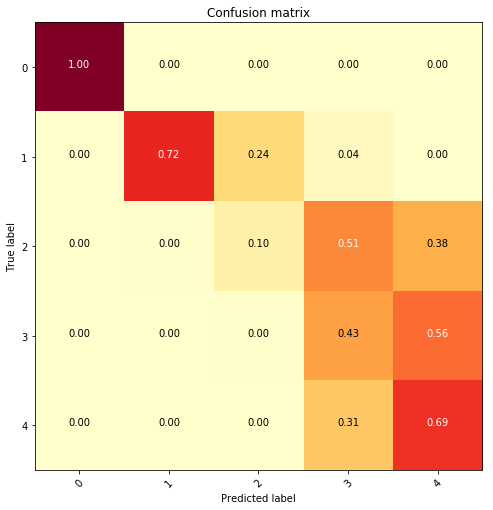

time_slice: 2 sec
accuracy_score: 0.65
mean_absolute_error: 0.405


In [10]:
train_data = []
test_data = []
    
train_data.append(time_sliced[time_sliced['location'] == LAB]) 
train_data.append(time_sliced[time_sliced['location'] == TSUR])
test_data.append(time_sliced[time_sliced['location'] == VIC])

train_data  = pd.concat(train_data, axis=0) #first 80% of data for label i
test_data   = pd.concat(test_data, axis=0)   #last 20% of data for label i
train_data.drop('location', axis=1, inplace=True)
test_data.drop('location', axis=1, inplace=True)

#train_data = train_data.sample(frac=1).reset_index(drop=True) #mix the data!!!
#test_data  = test_data.sample(frac=1).reset_index(drop=True) #mix the data!!!

train_labels = train_data['Label'] #get labels
test_labels = test_data['Label'] #get labels
train_data = train_data.drop('Label',axis=1) #remove labels from data
test_data = test_data.drop('Label',axis=1) #remove labels from data    
    

#fit classifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(train_data ,train_labels)
pred = clf.predict(test_data)


features = list(train_data.columns.values)
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(1,figsize = (10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


plt.figure(2, figsize = (7, 7))
plot_confusion_matrix(test_labels, pred)

acc_score = "{:.2f}".format(accuracy_score(test_labels , pred))
mean_absolute_err = "{:.3f}".format(mean_absolute_error(test_labels , pred))
print('time_slice:', time_slice, 'sec')
print ('accuracy_score:',acc_score)
print ('mean_absolute_error:', mean_absolute_err)

# trying different time-slices

slice size: 1 s, acc_score: 59 %, mean_abs_err: 0.476 

slice size: 2 s, acc_score: 66 %, mean_abs_err: 0.396 

slice size: 3 s, acc_score: 56 %, mean_abs_err: 0.459 

slice size: 4 s, acc_score: 61 %, mean_abs_err: 0.399 

slice size: 5 s, acc_score: 57 %, mean_abs_err: 0.440 

slice size: 6 s, acc_score: 60 %, mean_abs_err: 0.409 

slice size: 7 s, acc_score: 56 %, mean_abs_err: 0.434 

slice size: 8 s, acc_score: 59 %, mean_abs_err: 0.414 

slice size: 9 s, acc_score: 57 %, mean_abs_err: 0.426 

slice size: 10 s, acc_score: 59 %, mean_abs_err: 0.416 

slice size: 11 s, acc_score: 57 %, mean_abs_err: 0.419 

slice size: 12 s, acc_score: 61 %, mean_abs_err: 0.387 

slice size: 13 s, acc_score: 61 %, mean_abs_err: 0.393 

slice size: 14 s, acc_score: 61 %, mean_abs_err: 0.396 

slice size: 15 s, acc_score: 63 %, mean_abs_err: 0.376 

slice size: 16 s, acc_score: 65 %, mean_abs_err: 0.352 

slice size: 17 s, acc_score: 63 %, mean_abs_err: 0.367 

slice size: 18 s, acc_score: 65 %, mean_

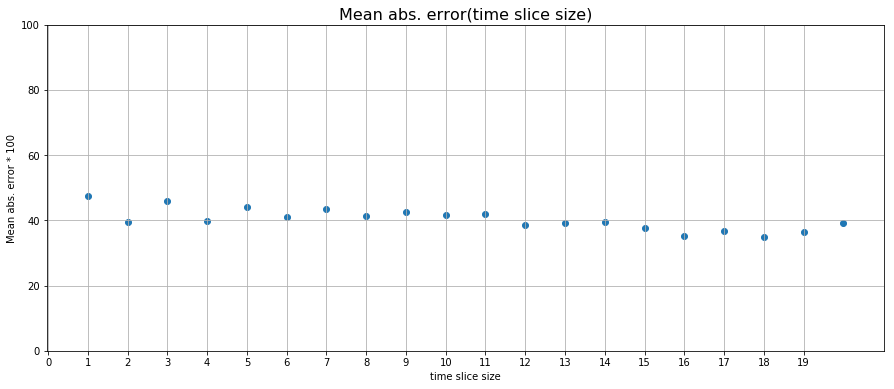

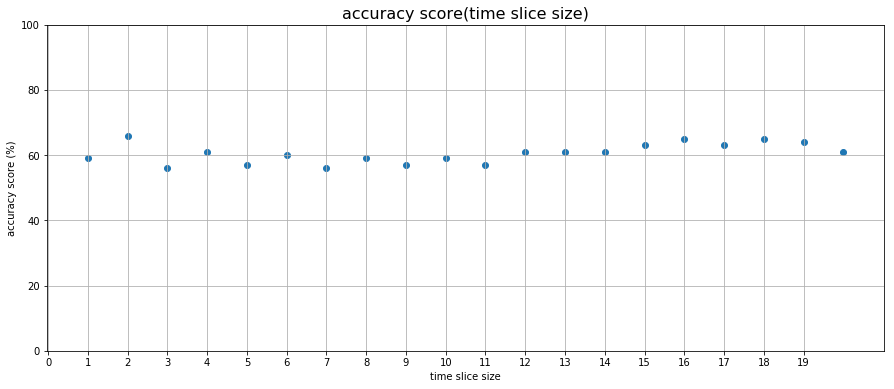

In [11]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from math import ceil
import timeit

start = timeit.default_timer() #to measure runtime

time_slices = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]; #in seconds
num_labels = 5;
'''
num_dfs_tot = 0
labels_dfs = [0]*num_labels
'''
sec_to_cut = 15
acc_scores = []
maes = []

#to read multiple CSVs automatically
import glob
path = r'C:\Desktop stuff\university\camera captures\sit_exp' 
allFolderPaths = glob.glob(path + "/*")

'''
#read all CSVs for label i, and cut 15 sec of start and end of each video.
for i in range(num_labels) :
    labels_dfs[i] = [pd.read_csv(f) for f in glob.glob(allFolderPaths[i] + "/*.csv")]
    for j in range(len(labels_dfs[i])) :
        labels_dfs[i][j].drop(['Source' , 'Destination' , 'Protocol' , 'Info' , 'No.'], axis=1, inplace=True)
        labels_dfs[i][j] = labels_dfs[i][j][labels_dfs[i][j].Time > sec_to_cut]
        labels_dfs[i][j] = labels_dfs[i][j][labels_dfs[i][j].Time < labels_dfs[i][j]["Time"].iloc[-1] - sec_to_cut]
        labels_dfs[i][j]['Time'] -= sec_to_cut
        labels_dfs[i][j]['Label'] = i
        labels_dfs[i][j]['location'] = j
'''
        
for s in range(len(time_slices)) :
    time_sliced = pd.DataFrame()
    for i in range(num_labels) :
        for j in range(len(labels_dfs[i])) :
            df = labels_dfs[i][j] 
            df['TimeSlice'] = (np.array(labels_dfs[i][j]['Time'])/time_slices[s]).astype(int)
            df = df.groupby('TimeSlice',axis=0 ,sort = 'False').agg(
            {'Time'     : ['count', 'std', 'mean'],
             'Length'   : ['mean', 'sum', 'std'],
             'Label'    : 'first',
             'location'    : 'first'}).fillna(0)
            time_sliced = time_sliced.append(df)
    
    time_sliced.columns = ["_".join(x) for x in df.columns.ravel()]
    time_sliced.rename(columns={'Time_count':'pack_count',
                          'Label_first':'Label',
                          'location_first':'location'}, inplace=True)
    
    train_data = []; test_data = []
        
    train_data.append(time_sliced[time_sliced['location'] == LAB])  #lab
    train_data.append(time_sliced[time_sliced['location'] == TSUR])  #tsur
    test_data.append(time_sliced[time_sliced['location'] == VIC])   #vic
    
    train_data  = pd.concat(train_data, axis=0) 
    test_data   = pd.concat(test_data, axis=0)   
    train_data.drop('location', axis=1, inplace=True)
    test_data.drop('location', axis=1, inplace=True)
    
    train_labels = train_data['Label'] #get labels
    test_labels = test_data['Label'] #get labels
    train_data = train_data.drop('Label',axis=1) #remove labels from data
    test_data = test_data.drop('Label',axis=1) #remove labels from data    
        
    
    clf = RandomForestClassifier(n_estimators = 100)
    clf.fit(train_data ,train_labels)
    pred = clf.predict(test_data)
    
    acc_score = "{:.2f}".format(accuracy_score(test_labels , pred))
    mean_absolute_err = "{:.3f}".format(mean_absolute_error(test_labels , pred))
    acc_scores.append(int(float(acc_score)*100))
    maes.append(float(float(mean_absolute_err)*100))
    print ('slice size:', time_slices[s], 's,', 'acc_score:',int(float(acc_score)*100), '%, mean_abs_err:', mean_absolute_err, '\n')

stop = timeit.default_timer() #to measure runtime
print('RunTime:', "{:.1f}".format(stop - start), 'sec.')


plt.figure(3,figsize=(15,6))
plt.title('Mean abs. error(time slice size)',fontsize=16)
plt.xlabel('time slice size'); plt.ylabel('Mean abs. error * 100')
plt.xticks(np.arange(0,20), np.arange(0,20).astype(int))
plt.ylim([0,100])
plt.grid()
plt.scatter(time_slices,maes)
#plt.plot(time_slices,maes)

plt.figure(4,figsize=(15,6))
plt.title('accuracy score(time slice size)',fontsize=16)
plt.xlabel('time slice size'); plt.ylabel('accuracy score (%)')
plt.xticks(np.arange(0,20), np.arange(0,20).astype(int))
plt.grid()
plt.ylim([0,100])
plt.scatter(time_slices,acc_scores)


In [12]:
num_dfs_tot

15

# Different approach - splitting to H.264 frames: analisys  graphs

C:\Users\wnp387\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)
C:\Users\wnp387\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


time:   4.671967506408691


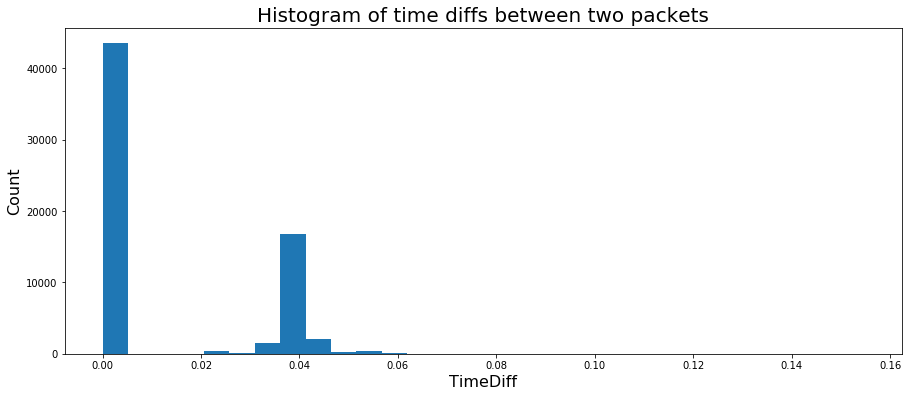

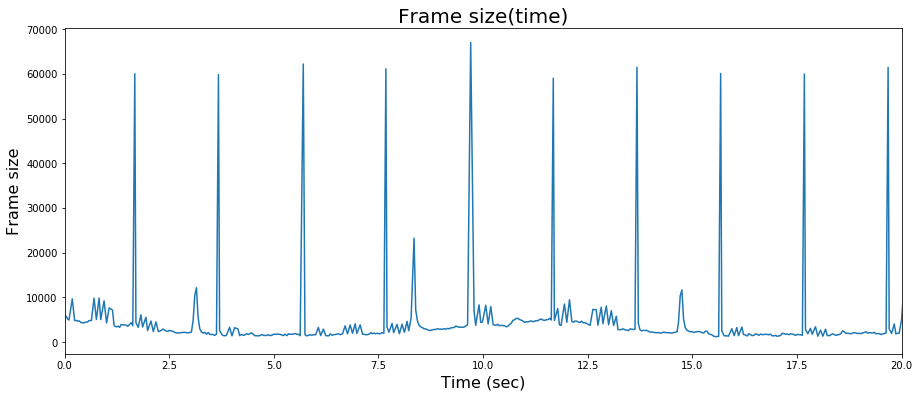

In [13]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from math import ceil
import timeit

time_slice = 10; #in seconds
num_labels = 5;
'''
num_dfs_tot = 0
labels_dfs = [0]*num_labels
'''

# Find the Time diff that shows when a frame ends

combined = pd.DataFrame()

seconds_in_DFs_list = [0]*num_dfs_tot #in a every single video dataframe
time_slice_list     = [0]*num_dfs_tot #initiallization
indexes_to_split_frame_by_list = [0]*num_dfs_tot #initiallization
time_sliced_df_list = []


start = timeit.default_timer() #to measure runtime

for k in range(num_labels) : #slice data frames by time slice seconds
    for i in list(range(len(labels_dfs[k]))) : #slice data frames by time slice seconds
        #"lose" non essential data
       #labels_dfs[k][i].drop(['Source' , 'Destination' , 'Protocol' , 'Info' , 'No.'], axis=1, inplace=True)
       #labels_dfs[k][i]['Time']  = labels_dfs[k][i]['Time'].astype('float') #change Time column data to int type 
       combined = combined.append(labels_dfs[k][i])
       
       seconds_in_DFs_list[i] = int(ceil(labels_dfs[k][i].at[len(labels_dfs[k][i])-1,'Time'])) #number of seconds in current df
       time_slice_list[i] = list(range(0,seconds_in_DFs_list[i],time_slice)) #list of times to slice by
       indexes_to_split_frame_by_list[i] = list(range(0,seconds_in_DFs_list[i],time_slice)) #initialization
       
       for j in list(range(len(time_slice_list[i]))): #calc indexes to slice by
           #find first index of labels_dfs[k][i]['Time'] the exceeds time_slice_list[i][j]
           indexes_to_split_frame_by_list[i][j] = np.argmax(labels_dfs[k][i]['Time'] > time_slice_list[i][j]) -1 #TODO: moved below.
                
       df_slice = pd.DataFrame() 
       
       for j in list(range(len(time_slice_list[i]))): #TODO: change for efficiency.
           #print(len(time_slice_list[i]))
           #indexes_to_split_frame_by_list[i][j] = np.argmax(labels_dfs[k][i]['Time'] > time_slice_list[i][j]) -1 TODO: doesnt work because we need j+1.
           if (j != len(time_slice_list[i])-1 and j != 0):  #not first or last index
               ind_start = indexes_to_split_frame_by_list[i][j] + 1
               ind_end = indexes_to_split_frame_by_list[i][j+1] + 1
           elif j == len(time_slice_list[i])-1:             #last index
               ind_start = indexes_to_split_frame_by_list[i][j] + 1
               ind_end = len(labels_dfs[k][i])
           else:                                            # j==0, first index
               ind_start = 0
               ind_end = indexes_to_split_frame_by_list[i][j+1]+1
           
           df_slice = labels_dfs[k][i][ind_start:ind_end]
           df_slice.loc[:,'Time'] = df_slice['Time'].diff().fillna(0) #calc time diffs, not time since begining of recording packets.
           time_sliced_df_list.append(df_slice)
         

combined.to_csv('combined.csv',index=False)


timeDiffCol = labels_dfs[1][1]['Time']
import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,6))
plt.hist(timeDiffCol, bins = 30)
#plt.xlim(0,0.1)
plt.xlabel('TimeDiff', fontsize=16); plt.ylabel('Count', fontsize=16)
plt.title("Histogram of time diffs between two packets", fontsize = 20)

#%% Distinguish between the frames

labels_dfs[1][1]['frameNum'] = 0
j=0
timeDiffCol.reset_index(drop = True , inplace = True)
labels_dfs[1][1].reset_index(drop = True ,inplace = True)

import time
t0 = time.time()
for idx,row in labels_dfs[1][1].iterrows():
    if(timeDiffCol[idx] < 0.025) : 
        labels_dfs[1][1].at[idx,'frameNum'] = j
    else:
        j += 1
        labels_dfs[1][1].at[idx,'frameNum'] = j
print ('time:  ', time.time()-t0)


united = labels_dfs[1][1].groupby('frameNum',axis=0).sum()
united['Time'] = np.cumsum(united['Time'])

plt.figure(2, figsize=(15,6))
plt.title("Frame size(time)", fontsize = 20)
plt.xlabel('Time (sec)', fontsize=16); plt.ylabel('Frame size', fontsize=16)
plt.xlim(0,20)
plt.plot(united['Time'],united['Length'])


# we can see the I frames and the P frames from the above graph. 
#the other graph is the graph by which we determined to which frame does a packet belong

# splitting to H.264 frames

In [14]:

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from math import ceil
import timeit
from skimage import filters
import matplotlib.pyplot as plt

thresholds = [0]*num_labels
combined_DF= pd.DataFrame()

#%%
timeDiffCol = pd.Series()
n=0

for i in range(num_labels) :
    thresholds[i] = [0]*len(labels_dfs[i])
    
    for j in range(len(labels_dfs[i])) :
        thresholds[i][j] = filters.threshold_otsu(labels_dfs[i][j]['Time'],nbins=30)
        df_size = len(labels_dfs[i][j])
        
        for idx,row in labels_dfs[i][j].iterrows():

            if(labels_dfs[i][j].at[idx,'Time'] < thresholds[i][j]) : 
                labels_dfs[i][j].at[idx,'frameNum'] = n
            else:
                n += 1
                labels_dfs[i][j].at[idx,'frameNum'] = n
                labels_dfs[i][j].at[idx,'Time diff pre'] = labels_dfs[i][j].at[idx,'Time']
        
        combined_DF = pd.concat([combined_DF , labels_dfs[i][j]])

united = combined_DF.groupby('frameNum' ,sort = 'False').agg({'Time': ['std' ,'mean'],
                                                                  'Length' : ['std' , 'mean' , 'sum'],
                                                                  'Label' : 'first',
                                                                  'Time diff pre':'first'}).fillna(0)
united.columns = ["".join(x) for x in united.columns.ravel()]

united.head(15)

,Timestd,Timemean,Lengthstd,Lengthmean,Lengthsum,Labelfirst,Time diff prefirst
frameNum,,,,,,,
0.0,0.000000,0.000000,0.000000,478.000000,478,0,0.000000
1.0,0.000000,0.040137,0.000000,210.000000,210,0,0.040137
2.0,0.000000,0.039797,0.000000,190.000000,190,0,0.039797
3.0,0.000000,0.040181,0.000000,190.000000,190,0,0.040181
4.0,0.000000,0.040173,0.000000,178.000000,178,0,0.040173
5.0,0.003586,0.000684,367.901952,1391.466667,83488,0,0.027936
6.0,0.027769,0.019934,673.165656,1038.000000,2076,0,0.039570
7.0,0.000000,0.039343,0.000000,842.000000,842,0,0.039343
8.0,0.000000,0.039706,0.000000,710.000000,710,0,0.039706


# bitrate graph for sitting experiment

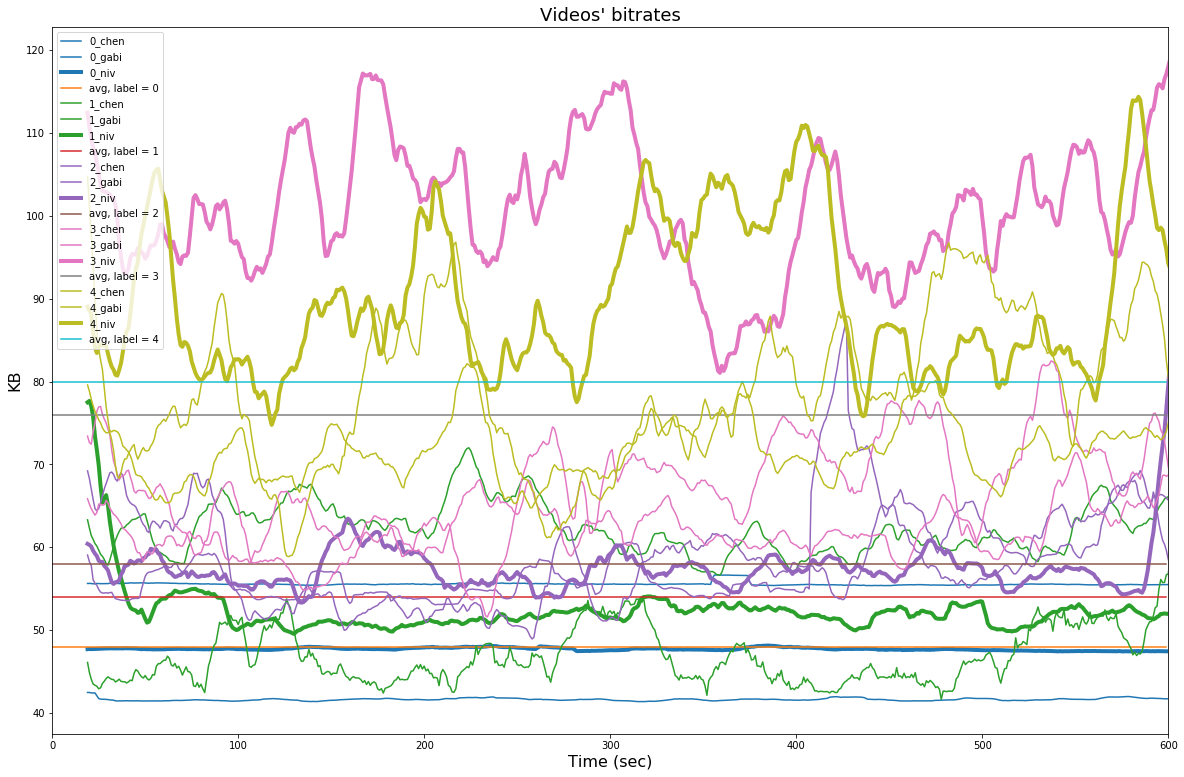

In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean 

num_labels = len(allFolderPaths);
labels_dfs = [0]*num_labels
fileNames = [0]*num_labels

categories_or_singles = "cat"

#to read multiple CSVs automatically
import glob
path = r'C:\Desktop stuff\university\camera captures\sit_exp' 
allFolderPaths = glob.glob(path + "/*")

plt.figure(figsize=(20, 13))
legendTitles = []
ax = plt.gca() 
#max_spec_bitrate = [512]*1200
max_observed_bitrate = [458]*600
avgs = [0]*num_labels

for i in range(num_labels) :
    labels_dfs[i] = [pd.read_csv(f) for f in glob.glob(allFolderPaths[i] + "/*.csv")]
    fileNames[i] = [f for f in glob.glob(allFolderPaths[i] + "/*.csv")]
    plt.xlim((0,600))
    color = next(ax._get_lines.prop_cycler)['color']
    avgs[i] = []

#    legendTitles = []

    for j in range(len(labels_dfs[i])) :
        labels_dfs[i][j].drop(['Source' , 'Destination' , 'Protocol' , 'Info' , 'No.'], axis=1, inplace=True)
        labels_dfs[i][j] = labels_dfs[i][j][labels_dfs[i][j].Time > 15]
        labels_dfs[i][j] = labels_dfs[i][j][labels_dfs[i][j].Time < labels_dfs[i][j]["Time"].iloc[-1] - 15]
        labels_dfs[i][j]['Time'] -= 15
        labels_dfs[i][j]['Label'] = i
        labels_dfs[i][j]['location'] = j
        
        short_fileName = fileNames[i][j].replace('C:\\Desktop stuff\\university\\camera captures\\sit_exp\\' 
                                  + str(i) + '\\', '')
        
        short_fileName = short_fileName.replace('.csv', '')
        legendTitles.append(short_fileName) #'vid ' + str(i) + '.' + str(j+1))
        df = labels_dfs[i][j]
        df['key'] = np.array(df['Time']).astype(int)
        df = df.groupby('key',axis=0).sum()
        
        #VR_funcs.PlotXYZ(df['Time'], df['Length'], [1]*len(df['Time']))
        df['bytes'] = df['Length'].cumsum()  
        #df['timeSUM'] = df['Time'].cumsum()  
        df['BPS'] = df['bytes']/df['Time']
        bps = float("{:.1f}".format(df['Length'].sum() / (len(df['Length'])*1000)))
#        df['Length'].sum() / df['Time'].sum()
#        location = df['location'][0]
        avgs[i].append(bps)
        
        df['rollLen'] = df['Length'].rolling(20).mean()
        df['rollLen'] = df['rollLen']/1000
        
        if(categories_or_singles == "cat"):
            if j == 2:
                plt.plot(range(len(df['Length'])), df['rollLen'] , linestyle = '-', color = color, linewidth=4.0)
            else:    
                plt.plot(range(len(df['Length'])), df['rollLen'] , color = color)
        else:
            if j == 2:
                plt.plot(range(len(df['Length'])), df['rollLen'], linestyle = '-', linewidth=4.0)
            else:  
                plt.plot(range(len(df['Length'])), df['rollLen'])
#            plt.ylim((0,350))
        
        #legend = plt.legend(handles=[one, two, three], title="title", loc=4, fontsize='small', fancybox=True)
        plt.xlabel('Time (sec)', fontsize=16); plt.ylabel('KB', fontsize=16)
#        break
        

    avgs[i] = int(mean(avgs[i]))
    avgLine = [avgs[i]]*600
    legendTitles.append("avg, label = " + str(i))
    plt.plot(range(len(avgLine)), avgLine)
#legendTitles.append("max_spec_bitrate") #'vid ' + str(i) + '.' + str(j+1))    
#plt.plot(range(len(max_spec_bitrate)), max_spec_bitrate)
#legendTitles.append("max_observed_bitrate") #'vid ' + str(i) + '.' + str(j+1))    
#plt.plot(range(len(max_observed_bitrate)), max_observed_bitrate)
plt.title("Videos' bitrates", fontsize=18)
plt.legend(legendTitles)
plt.show()




# predicting sitting for different time-slices

slice size: 1 sec.
acc_score: 45 %, mean_abs_err: 0.815 

slice size: 2 sec.
acc_score: 33 %, mean_abs_err: 0.889 

slice size: 3 sec.
acc_score: 46 %, mean_abs_err: 0.762 

slice size: 4 sec.
acc_score: 20 %, mean_abs_err: 1.210 

slice size: 5 sec.
acc_score: 41 %, mean_abs_err: 0.754 

slice size: 6 sec.
acc_score: 23 %, mean_abs_err: 1.096 

slice size: 7 sec.
acc_score: 35 %, mean_abs_err: 0.776 

slice size: 8 sec.
acc_score: 27 %, mean_abs_err: 0.963 

slice size: 9 sec.
acc_score: 35 %, mean_abs_err: 0.767 

slice size: 10 sec.
acc_score: 33 %, mean_abs_err: 0.828 

slice size: 11 sec.
acc_score: 38 %, mean_abs_err: 0.672 

slice size: 12 sec.
acc_score: 33 %, mean_abs_err: 0.794 

slice size: 13 sec.
acc_score: 41 %, mean_abs_err: 0.689 

slice size: 14 sec.
acc_score: 45 %, mean_abs_err: 0.598 

slice size: 15 sec.
acc_score: 47 %, mean_abs_err: 0.571 

slice size: 16 sec.
acc_score: 42 %, mean_abs_err: 0.613 

slice size: 17 sec.
acc_score: 47 %, mean_abs_err: 0.552 

slice 

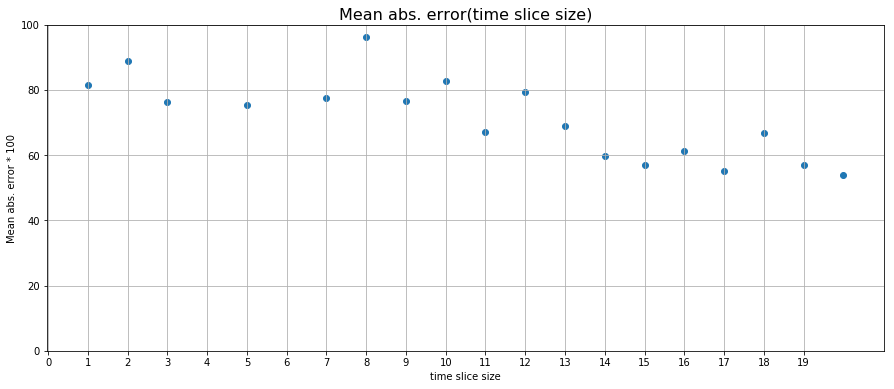

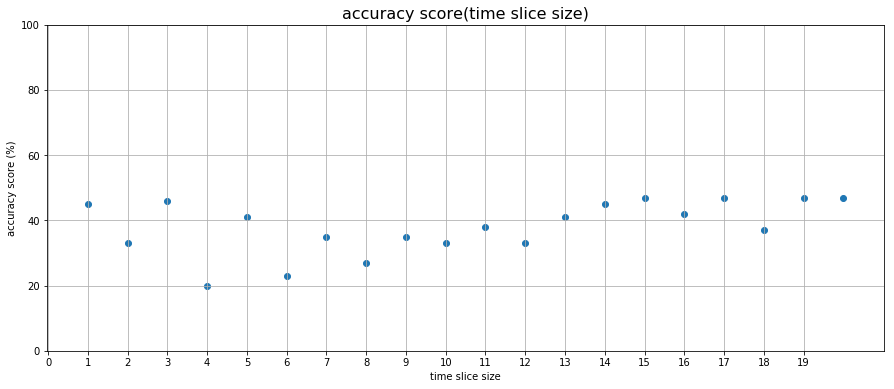

In [16]:
start = timeit.default_timer() #to measure runtime

time_slices = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]; #in seconds
acc_scores = []
maes = []
        
for s in range(len(time_slices)) :
    time_sliced = pd.DataFrame()
    for i in range(num_labels) :
        for j in range(len(labels_dfs[i])) :
            df = labels_dfs[i][j] 
            df['TimeSlice'] = (np.array(labels_dfs[i][j]['Time'])/time_slices[s]).astype(int)
            df = df.groupby('TimeSlice',axis=0 ,sort = 'False').agg(
            {'Time'     : ['count', 'std', 'mean'],
             'Length'   : ['mean', 'sum', 'std'],
             'Label'    : 'first',
             'location'    : 'first'}).fillna(0) 
            time_sliced = time_sliced.append(df)
    
    time_sliced.columns = ["_".join(x) for x in df.columns.ravel()]
    
    
    train_data = []; test_data = []
        
    train_data.append(time_sliced[time_sliced['location_first'] == LAB])  #lab
    train_data.append(time_sliced[time_sliced['location_first'] == TSUR])  #tsur
    test_data.append(time_sliced[time_sliced['location_first'] == VIC])   #vic
    
    train_data  = pd.concat(train_data, axis=0) 
    test_data   = pd.concat(test_data, axis=0)   
    train_data.drop('location_first', axis=1, inplace=True)
    test_data.drop('location_first', axis=1, inplace=True)
    
    train_labels = train_data['Label_first'] #get labels
    test_labels = test_data['Label_first'] #get labels
    train_data = train_data.drop('Label_first',axis=1) #remove labels from data
    test_data = test_data.drop('Label_first',axis=1) #remove labels from data    
        
    
    clf = RandomForestClassifier(n_estimators = 100)
    clf.fit(train_data ,train_labels)
    pred = clf.predict(test_data)
    
    acc_score = "{:.2f}".format(accuracy_score(test_labels , pred))
    mean_absolute_err = "{:.3f}".format(mean_absolute_error(test_labels , pred))
    acc_scores.append(int(float(acc_score)*100))
    maes.append(float(float(mean_absolute_err)*100))
    print('slice size:', time_slices[s], 'sec.')
    print ('acc_score:',int(float(acc_score)*100), '%, mean_abs_err:', mean_absolute_err, '\n')
    

stop = timeit.default_timer() #to measure runtime
print('RunTime:', "{:.1f}".format(stop - start), 'sec.')


plt.figure(3,figsize=(15,6))
plt.title('Mean abs. error(time slice size)',fontsize=16)
plt.xlabel('time slice size'); plt.ylabel('Mean abs. error * 100')
plt.xticks(np.arange(0,20), np.arange(0,20).astype(int))
plt.ylim([0,100])
plt.grid()
plt.scatter(time_slices,maes)
#plt.plot(time_slices,maes)

plt.figure(4,figsize=(15,6))
plt.title('accuracy score(time slice size)',fontsize=16)
plt.xlabel('time slice size'); plt.ylabel('accuracy score (%)')
plt.xticks(np.arange(0,20), np.arange(0,20).astype(int))
plt.grid()
plt.ylim([0,100])
plt.scatter(time_slices,acc_scores)
#plt.plot(time_slices,acc_scores)
